### KMEANS CLUSTERING OF UGANDAN MINERAL CONCESSIONS

Performing predictive analytics with python or any data analytics programming language requires supporting libraries/packages. We begin by importing these libraries. In this case pandas is used to manipulate dataframes, sklearn is used to provide modules or methods that do predictive modeling, the same as scipy. Numpy is used to handle numbers. If you are not farmiliar with these packages, you can further read about them from their main websites. They are pretty easy to understand.

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np

In [2]:
#imporint the data for handling
data = pd.read_csv("D:\\2019 projects\\uganda 1\\mineral-concessions.csv")

In [14]:
# having a look at how the dataset looks like 
data.head()

,Code,Parties,Jurisdiction,Type,Commodity,Status,Application date,Grant date,Expiry date,Number of licence renewals,Mining area,Application number,Comments,Map_Refe,guidSHectarep,guidLice,PartName
0,TN2572,2M CAPITAL LIMITED,Uganda,Exploration licence,Pozzolana,Application,21-Jun-17,NaN,NaN,NaN,43.6000 square kilometer,TN2572,NaN,"Western Region, Rubirizi",97e9e5eb-45af-4544-bd53-93a62f11c637,41b6661a-9653-4509-98f5-f5ffc27acb34,Part 1
1,EL1347,3M MINING LIMITED (100%),Uganda,Exploration licence,Iron Ore,Active,27-Mar-14,19-Jun-14,18-Jun-17,0.0,6.1600 square kilometer,TN1941,NaN,"Eastern Region, Manafwa",3ac47e23-0305-4ac8-8f5f-e43ccea1893c,41b6661a-9653-4509-98f5-f5ffc27acb34,Part 1
2,ML4647,3T MINING LIMITED (100%),Uganda,Mining lease,Coltan,Active,NaN,13-Jan-03,01-Dec-24,0.0,6.5512 Hectare,NaN,NaN,"Central Region, Wakiso",232da329-f9f1-481d-9a50-e6e01ef10535,ab102793-3b63-4ed5-89d8-01f5c7115285,Part 1
3,TN1930,ABM LOGISTIC (100%),Uganda,Exploration licence,"Base Metals, Gold, Platinum Group Metals, Rare...",Application,18-Mar-14,NaN,NaN,NaN,92.0418 square kilometer,TN1930,NaN,"Western Region, Hoima",e7cc3d9e-12e8-456b-8427-c3f79994e1f7,41b6661a-9653-4509-98f5-f5ffc27acb34,Part 1
4,TN2989,ACCESS MINING UGANDA SMC LIMITED,Uganda,Exploration licence,"Base Metals, Gold",Application,30-Nov-18,NaN,NaN,NaN,306.0000 square kilometer,TN2989,NaN,"Western Region, Kabarole",9a630495-66d7-4f4a-8af5-5f3f10af39c3,41b6661a-9653-4509-98f5-f5ffc27acb34,1


There are fields that are not needed to do clustering analysis. we therefore drop them. Some fields may look important but if they have lots of missing values, they are of no use to the clustering analysis.

In [5]:
data1 = data.drop(["Commodity","Code","Parties","Comments","Jurisdiction","Grant date","Expiry date",
                  "Number of licence renewals","guidSHectarep","guidSHectarep","guidLice","guidLice",
                  "Application date","Application number","Application number","Map_Refe"],axis=1)

In [6]:
data1 = data1.dropna()

In [7]:
inter_data=data1

In [8]:
inter_data.describe()

,Type,Status,Mining area,PartName
count,844,844,844,844
unique,4,2,641,5
top,Exploration licence,Application,0.1600 square kilometer,Part 1
freq,605,448,57,814


Mining area seems to be a categorical variable but when we have a look at it, we can see that it is a numerical variable with units. We need to clean this by removing the units and the commas. We then make the field numerical. This is done in the following steps.

In [9]:
inter_data["Mining area"].head()

0    43.6000 square kilometer 
1    6.1600 square kilometer  
2               6.5512 Hectare
3     92.0418 square kilometer
4    306.0000 square kilometer
Name: Mining area, dtype: object

In [10]:
inter_data["Mining area"]=inter_data["Mining area"].str.split(" ",n=1,expand=True)

In [11]:
inter_data["Mining area"]=inter_data["Mining area"].str.replace(',','')
inter_data["Mining area"]=pd.to_numeric(inter_data["Mining area"])

In [12]:
inter_data_one_hot=pd.get_dummies(inter_data.drop(["Mining area"],axis=1))

In [13]:
clean_inter_data=inter_data_one_hot.join(inter_data["Mining area"])

Cleaning the dataset takes more that three quarters of the modeling process. Predictive modelling takes just a simple portion of the process. In this predictive modeling, we use kmeans clustering. This is a machine learning clustering algorithm that finds the number of clusters in the dataset provided and then clusters the data in the different clusters. The first step is to estimate the number of clusters. The second step is to find the number of clusters.

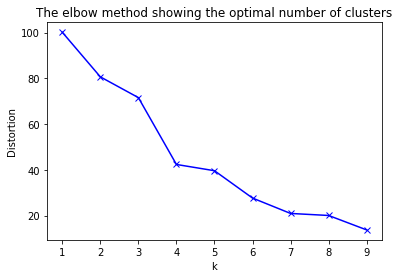

In [254]:
X=clean_inter_data.values
distortions = []
K=range(1,10)
for k in K:
    kmeansModel = KMeans(n_clusters = k)
    kmeansModel.fit(X)
    distortions.append(sum(np.min(cdist(X,kmeansModel.cluster_centers_,'euclidean'),axis=1))/X.shape[0])
plt.plot(K,distortions,'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The elbow method showing the optimal number of clusters')
plt.show()

In [255]:
kmeans=KMeans(n_clusters=4,random_state=0).fit(X)

In [256]:
labels=pd.DataFrame(kmeans.labels_)
labels.columns=["kmeans_labels"]
clust_data=data1.join(labels)

In [257]:
clust_data.head(50)

,Type,Status,Mining area,PartName,kmeans_labels
0,Exploration licence,Application,43.6000,Part 1,0
1,Exploration licence,Active,6.1600,Part 1,0
2,Mining lease,Active,6.5512,Part 1,0
3,Exploration licence,Application,92.0418,Part 1,0
4,Exploration licence,Application,306.0000,1,3
5,Exploration licence,Active,437.0000,Part 1,3
6,Exploration licence,Active,350.8417,Part 1,3
7,Exploration licence,Application,112.0000,Part 1,0
8,Exploration licence,Active,30.0000,Part 1,0
9,Exploration licence,Active,0.1517,Part 1,0
